In [13]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import dask.dataframe as dd
import json 
from pandas import json_normalize #package for flattening json in pandas df

path_to_json = './base/justica_estadual/processos-tjpe'

#load json object
with open(path_to_json + '/processos-tjpe_2.json') as f:
    d = json.load(f)

with open(path_to_json + '/processos-tjpe_3.json') as f:
    d += json.load(f)
    
df_dadosBasicos = json_normalize(d)
df_dadosBasicos.head(5)

#json_files = glob(path_to_json + '/*.json')
#print(f'{len(json_files)} files found.')

#df = pd.concat((pd.read_json(json_file) for json_file in json_files), axis=0)
#print(df.shape)
#df.head()

,millisInsercao,siglaTribunal,movimento,grau,dadosBasicos.valorCausa,dadosBasicos.numero,dadosBasicos.procEl,dadosBasicos.competencia,dadosBasicos.codigoLocalidade,dadosBasicos.assunto,dadosBasicos.dscSistema,dadosBasicos.tamanhoProcesso,dadosBasicos.dataAjuizamento,dadosBasicos.totalAssuntos,dadosBasicos.nivelSigilo,dadosBasicos.classeProcessual,dadosBasicos.orgaoJulgador.nomeOrgao,dadosBasicos.orgaoJulgador.codigoMunicipioIBGE,dadosBasicos.orgaoJulgador.codigoOrgao,dadosBasicos.orgaoJulgador.instancia
0,1597199001286,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000032519618170340,2,NaN,2602605,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19610513000000,1,0,159,VARA ÚNICA DA COMARCA DE BREJO DA MADRE DE DEUS,2602605,7714,ORIG
1,1597213580653,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000151319668170001,2,NaN,2611606,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19660908000000,1,0,159,2ª VARA DE EXECUÇÃO DE TÍTULOS EXTRAJUDICIAIS ...,2611606,18077,ORIG
2,1597201673591,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000018719688171220,2,NaN,2612208,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19680417000000,1,0,1116,2ª VARA CÍVEL DA COMARCA DE SALGUEIRO,2612208,7437,ORIG
3,1597213191981,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00003728519698170001,2,NaN,2611606,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19690124000000,1,0,159,1ª VARA DE EXECUÇÃO DE TÍTULOS EXTRAJUDICIAIS ...,2611606,18074,ORIG
4,1597226608853,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000016719698171280,2,NaN,2613008,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19690507000000,1,0,1116,2ª VARA DA COMARCA DE SÃO BENTO DO UNA,2613008,78796,ORIG


In [11]:
df_dadosBasicos.type()

AttributeError: 'DataFrame' object has no attribute 'type'

In [2]:
df_dadosBasicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   millisInsercao                                  7800 non-null   int64  
 1   siglaTribunal                                   7800 non-null   object 
 2   movimento                                       7800 non-null   object 
 3   grau                                            7800 non-null   object 
 4   dadosBasicos.valorCausa                         0 non-null      float64
 5   dadosBasicos.numero                             7800 non-null   object 
 6   dadosBasicos.procEl                             7800 non-null   int64  
 7   dadosBasicos.competencia                        0 non-null      float64
 8   dadosBasicos.codigoLocalidade                   7800 non-null   object 
 9   dadosBasicos.assunto                     

In [3]:
#df_dadosBasicos.groupby('codigoLocalidade').size().plot.pie()
df_dadosBasicos.groupby('dadosBasicos.classeProcessual').size().reset_index(name='count').sort_values('count', ascending=False)

,dadosBasicos.classeProcessual,count
5,1116,4701
0,159,1983
2,172,669
7,1118,360
6,1117,35
4,1114,23
8,12154,15
3,1112,11
1,166,3


<AxesSubplot:ylabel='None'>

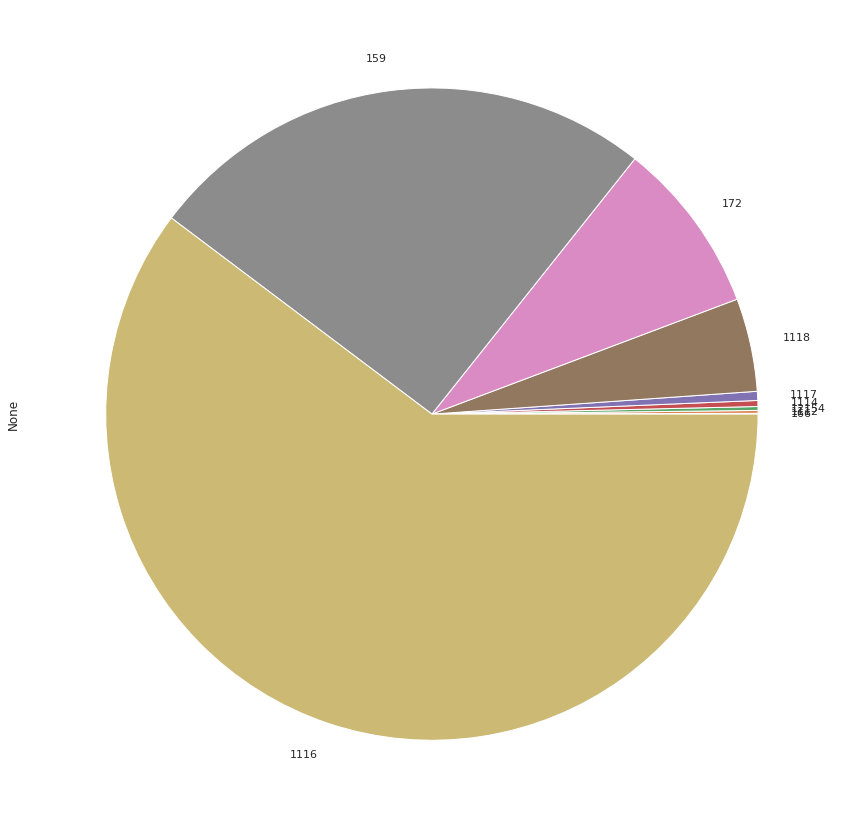

In [8]:
df_dadosBasicos.groupby('dadosBasicos.classeProcessual').size().sort_values().plot.pie(figsize=(15,15))

In [5]:
filtro = df_dadosBasicos['dadosBasicos.classeProcessual'] == 1116
df_dadosBasicos[filtro]

,millisInsercao,siglaTribunal,movimento,grau,dadosBasicos.valorCausa,dadosBasicos.numero,dadosBasicos.procEl,dadosBasicos.competencia,dadosBasicos.codigoLocalidade,dadosBasicos.assunto,dadosBasicos.dscSistema,dadosBasicos.tamanhoProcesso,dadosBasicos.dataAjuizamento,dadosBasicos.totalAssuntos,dadosBasicos.nivelSigilo,dadosBasicos.classeProcessual,dadosBasicos.orgaoJulgador.nomeOrgao,dadosBasicos.orgaoJulgador.codigoMunicipioIBGE,dadosBasicos.orgaoJulgador.codigoOrgao,dadosBasicos.orgaoJulgador.instancia
2,1597201673591,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000018719688171220,2,NaN,2612208,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19680417000000,1,0,1116,2ª VARA CÍVEL DA COMARCA DE SALGUEIRO,2612208,7437,ORIG
4,1597226608853,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000016719698171280,2,NaN,2613008,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19690507000000,1,0,1116,2ª VARA DA COMARCA DE SÃO BENTO DO UNA,2613008,78796,ORIG
6,1597221837317,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000052019698170920,1,NaN,2608909,"[{'principal': True, 'assuntoLocal': None, 'co...",8,NaN,19690926000000,1,0,1116,1ª VARA CÍVEL DA COMARCA DE LIMOEIRO,2608909,7628,ORIG
8,1597202076942,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000019119708170420,2,NaN,2603454,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19701013000000,1,0,1116,2ª VARA CÍVEL DA COMARCA DE CAMARAGIBE,2603454,6963,ORIG
10,1597216462101,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000197819718170420,2,NaN,2603454,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19710211000000,1,0,1116,2ª VARA CÍVEL DA COMARCA DE CAMARAGIBE,2603454,6963,ORIG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,1597205018428,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00066716719958170001,2,NaN,2611606,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19950127000000,1,0,1116,2ª VARA DOS EXECUTIVOS FISCAIS ESTADUAIS DA CA...,2611606,6668,ORIG
7794,1597216311924,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00000124519958170970,2,NaN,2609402,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19950129000000,1,0,1116,1ª VARA CÍVEL DA COMARCA DE MORENO,2609402,17374,ORIG
7797,1597203012731,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00070475319958170001,2,NaN,2611606,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19950131000000,1,0,1116,2ª VARA DOS EXECUTIVOS FISCAIS ESTADUAIS DA CA...,2611606,6668,ORIG
7798,1597216307311,TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1,NaN,00070129319958170001,2,NaN,2611606,"[{'principal': True, 'assuntoLocal': None, 'co...",None,NaN,19950131000000,1,0,1116,2ª VARA DOS EXECUTIVOS FISCAIS ESTADUAIS DA CA...,2611606,6668,ORIG
